In [42]:
import time
import os
import matplotlib.pyplot as plt
import random
import numpy as np

import torch
import torch.nn.functional as F
import torchvision.transforms as transforms
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import torch.nn as nn
from torchsummary import summary
from torch.cuda.amp import GradScaler
from torch.optim.lr_scheduler import ReduceLROnPlateau

now = time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(time.time()))
print("import OK at ", now)
data_path = r"C:\Users\jiant\Desktop\data\motion_controller\0930-DL-double\Double-Yaw"
class_name = ["backward", "forward", "rotation"]



import OK at  2022-10-06 13:26:14


vis data... 


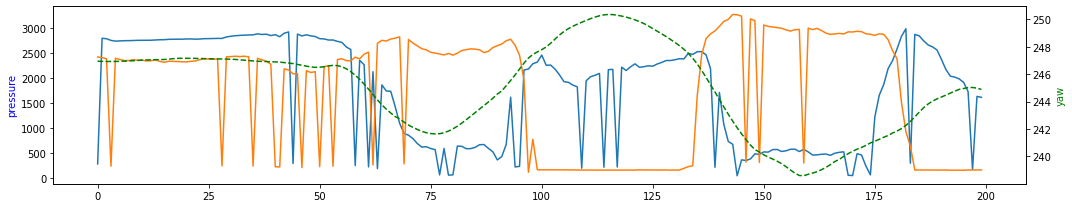

In [43]:
print("vis data... ")
path_dir = os.path.join(data_path, class_name[0])
with open(os.path.join(path_dir, "test1.txt")) as f:
    logs = f.read().split('\n')
    f1 = [int(i.split(",")[0]) for i in logs if i != '']
    f2 = [int(i.split(",")[1]) for i in logs if i != '']
    f3 = [int(i.split(",")[2]) for i in logs if i != '']
    f4 = [int(i.split(",")[3]) for i in logs if i != '']
    f5 = [int(i.split(",")[4]) for i in logs if i != '']
    f6 = [int(i.split(",")[5]) for i in logs if i != '']
    f7 = [int(i.split(",")[6]) for i in logs if i != '']
    f8 = [int(i.split(",")[7]) for i in logs if i != '']  # left data
    f9 = [float(i.split(",")[8]) for i in logs if i != '']
    f10 = [float(i.split(",")[9]) for i in logs if i != '']
    f11 = [float(i.split(",")[10]) for i in logs if i != '']
    f12 = [float(i.split(",")[11]) for i in logs if i != '']
    f13 = [float(i.split(",")[12]) for i in logs if i != '']
    f14 = [float(i.split(",")[13]) for i in logs if i != '']
    f15 = [float(i.split(",")[14]) for i in logs if i != '']
    f16 = [float(i.split(",")[15]) for i in logs if i != '']  # right data
    f17 = [float(i.split(",")[16]) for i in logs if i != '']  # yaw data

plt.rcParams['figure.figsize'] = (15, 3)  # 单位是inches
fig, axs = plt.subplots(1, 1)
random_start = 0
axs.plot(f4[random_start:random_start + 200])
axs.plot(f12[random_start:random_start + 200])

ax2 = axs.twinx()  # 做镜像处理
ax2.plot(f17[random_start:random_start + 200], 'g--')
axs.set_ylabel('pressure', color='b')  # 设置Y2轴标题
ax2.set_ylabel('yaw', color='g')  # 设置Y2轴标题

fig.tight_layout()

vis data... 


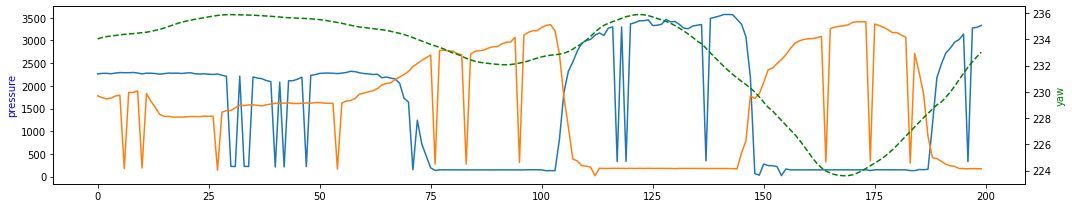

In [44]:
print("vis data... ")
path_dir = os.path.join(data_path, class_name[1])
with open(os.path.join(path_dir, "test1.txt")) as f:
    logs = f.read().split('\n')
    f1 = [int(i.split(",")[0]) for i in logs if i != '']
    f2 = [int(i.split(",")[1]) for i in logs if i != '']
    f3 = [int(i.split(",")[2]) for i in logs if i != '']
    f4 = [int(i.split(",")[3]) for i in logs if i != '']
    f5 = [int(i.split(",")[4]) for i in logs if i != '']
    f6 = [int(i.split(",")[5]) for i in logs if i != '']
    f7 = [int(i.split(",")[6]) for i in logs if i != '']
    f8 = [int(i.split(",")[7]) for i in logs if i != '']  # left data
    f9 = [float(i.split(",")[8]) for i in logs if i != '']
    f10 = [float(i.split(",")[9]) for i in logs if i != '']
    f11 = [float(i.split(",")[10]) for i in logs if i != '']
    f12 = [float(i.split(",")[11]) for i in logs if i != '']
    f13 = [float(i.split(",")[12]) for i in logs if i != '']
    f14 = [float(i.split(",")[13]) for i in logs if i != '']
    f15 = [float(i.split(",")[14]) for i in logs if i != '']
    f16 = [float(i.split(",")[15]) for i in logs if i != '']  # right data
    f17 = [float(i.split(",")[16]) for i in logs if i != '']  # yaw data

plt.rcParams['figure.figsize'] = (15, 3)  # 单位是inches
fig, axs = plt.subplots(1, 1)
random_start = 0
axs.plot(f4[random_start:random_start + 200])
axs.plot(f12[random_start:random_start + 200])

ax2 = axs.twinx()  # 做镜像处理
ax2.plot(f17[random_start:random_start + 200], 'g--')
axs.set_ylabel('pressure', color='b')  # 设置Y2轴标题
ax2.set_ylabel('yaw', color='g')  # 设置Y2轴标题

fig.tight_layout()

vis data... 


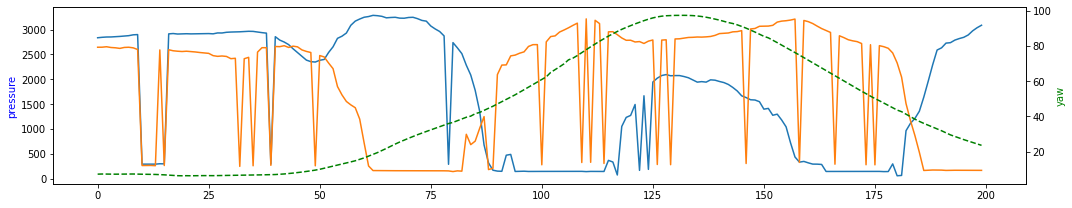

In [45]:
print("vis data... ")
path_dir = os.path.join(data_path, class_name[2])
with open(os.path.join(path_dir, "test1.txt")) as f:
    logs = f.read().split('\n')
    f1 = [int(i.split(",")[0]) for i in logs if i != '']
    f2 = [int(i.split(",")[1]) for i in logs if i != '']
    f3 = [int(i.split(",")[2]) for i in logs if i != '']
    f4 = [int(i.split(",")[3]) for i in logs if i != '']
    f5 = [int(i.split(",")[4]) for i in logs if i != '']
    f6 = [int(i.split(",")[5]) for i in logs if i != '']
    f7 = [int(i.split(",")[6]) for i in logs if i != '']
    f8 = [int(i.split(",")[7]) for i in logs if i != '']  # left data
    f9 = [float(i.split(",")[8]) for i in logs if i != '']
    f10 = [float(i.split(",")[9]) for i in logs if i != '']
    f11 = [float(i.split(",")[10]) for i in logs if i != '']
    f12 = [float(i.split(",")[11]) for i in logs if i != '']
    f13 = [float(i.split(",")[12]) for i in logs if i != '']
    f14 = [float(i.split(",")[13]) for i in logs if i != '']
    f15 = [float(i.split(",")[14]) for i in logs if i != '']
    f16 = [float(i.split(",")[15]) for i in logs if i != '']  # right data
    f17 = [float(i.split(",")[16]) for i in logs if i != '']  # yaw data

plt.rcParams['figure.figsize'] = (15, 3)  # 单位是inches
fig, axs = plt.subplots(1, 1)
random_start = 0
axs.plot(f4[random_start:random_start + 200])
axs.plot(f12[random_start:random_start + 200])

ax2 = axs.twinx()  # 做镜像处理
ax2.plot(f17[random_start:random_start + 200], 'g--')
axs.set_ylabel('pressure', color='b')  # 设置Y2轴标题
ax2.set_ylabel('yaw', color='g')  # 设置Y2轴标题

fig.tight_layout()

In [46]:
# 数据前处理 函数
def pre_processor(path_file_name):
    WINDOW_SIZE = 5
    THRESHOLD = 1800
    SENSOR_NUMBER = 8
    STEP = 0

    with open(path_file_name) as f:
        logs = f.read().split('\n')
        logs.pop()  # 去除最后一行的空白
        f_list_left = [[], [], [], [], [], [], [], []]
        f_list_right = [[], [], [], [], [], [], [], []]
        yaw_list = []
        for item in logs:
            temp_list = item.split(",")
            for i in range(8):
                f_list_left[i].append(int(temp_list[i]))
            for i in range(8, 16):
                f_list_right[i - 8].append(int(temp_list[i]))
            yaw_list.append(float(temp_list[16]))

    length = len(f_list_left[0])
    left = 0
    right = 0
    continue_lift = False  # 判断前一个窗口脚是否已经凌空（抬起）
    step_list = [[], []]
    down_list = [[], []]
    # 滑动窗口，先算左脚
    while left + WINDOW_SIZE < length:
        count = 0  # 计算符合条件的传感器数量
        for sensor in range(SENSOR_NUMBER):
            below_threshold = True
            # 对于每一个传感器 新建一个自己的窗口
            for i in range(left, left + WINDOW_SIZE):
                if f_list_left[sensor][i] > THRESHOLD:
                    below_threshold = False
                    break
            if below_threshold:
                count += 1

        if count > SENSOR_NUMBER * 0.75 and not continue_lift:
            STEP += 1
            continue_lift = True  # 将当前状态置为腾空
            step_list[0].append(left)
        elif count <= SENSOR_NUMBER * 0.75:
            if not continue_lift:
                pass
            else:  # 检测到压下
                continue_lift = False  # 将当前状态置为非腾空
                down_list[0].append(left)
        left += 1  # 窗口后移

    # 滑动窗口，再算右脚
    continue_lift = False
    while right + WINDOW_SIZE < length:
        count = 0  # 计算符合条件的传感器数量
        for sensor in range(SENSOR_NUMBER):
            below_threshold = True
            # 对于每一个传感器 新建一个自己的窗口
            for i in range(right, right + WINDOW_SIZE):
                if f_list_right[sensor][i] > THRESHOLD:
                    below_threshold = False
                    break
            if below_threshold:
                count += 1

        if count > SENSOR_NUMBER * 0.75 and not continue_lift:
            STEP += 1
            continue_lift = True  # 将当前状态置为腾空
            step_list[1].append(right)
        elif count <= SENSOR_NUMBER * 0.75:
            if not continue_lift:
                pass
            else:  # 检测到压下
                continue_lift = False  # 将当前状态置为非腾空
                down_list[1].append(right)
        right += 1  # 窗口后移

    length_list = []
    result_list = []

    for i in range(len(step_list[0])):
        l = down_list[0][i] - step_list[0][i]
        if l < 10:
            continue
        if l > 40:
            down_list[0][i] = step_list[0][i] + 40
        length_list.append((step_list[0][i], down_list[0][i]))

    for i in range(len(step_list[1])):
        l = down_list[1][i] - step_list[1][i]
        if l < 10:
            continue
        if l > 40:
            down_list[1][i] = step_list[1][i] + 40
        length_list.append((step_list[1][i], down_list[1][i]))

    length_list.sort()

    for item in length_list:
        group = []
        for j in range(item[0], item[1]):
            line = []
            for k in range(8):
                line.append(f_list_left[k][j])
            for k in range(8):
                line.append(f_list_right[k][j])
            line.append(yaw_list[j])
            group.append(line)
        result_list.append(group)
    # print(len(result_list))
    return result_list, f_list_left, f_list_right, step_list, down_list

(array([0.07352941, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.29411765, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.22058824, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.36764706, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.73529412,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.51470588, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.80882353, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.80882353, 0.        , 0.        ,
        0.        , 0.        , 0.58823529, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.22058824, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.29411765,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.29411765, 0.        , 0.        , 0.  

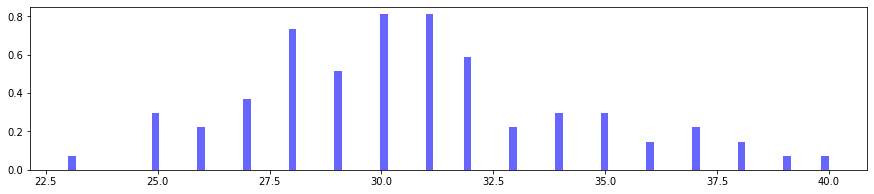

In [47]:
#数据前处理 可视化
the_list, f_list_left, f_list_right, step_list, down_list = pre_processor(r"C:\Users\jiant\Desktop\data\motion_controller\0930-DL-double\Double-Yaw\backward\test1.txt")
# 画频率分布图
length_list = []
for item in the_list:
    length_list.append(len(item))
plt.hist(length_list, bins=100, density=True, alpha=0.6, color='b')

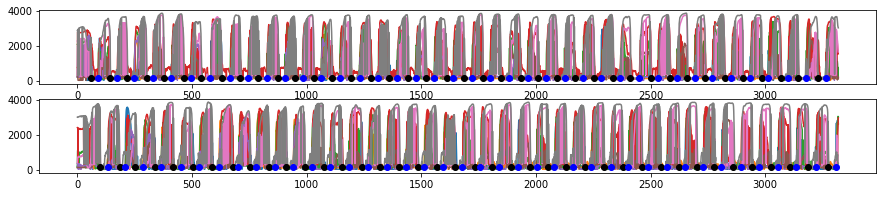

In [48]:
# 画压力曲线图
fig = plt.figure()
ax = fig.add_subplot(2, 1, 1)
for i in range(8):
    ax.plot(f_list_left[i], zorder=1)

for x in step_list[0]:
    ax.scatter(x, 150, c='k', zorder=2)

for y in down_list[0]:
    ax.scatter(y, 150, c='b', zorder=2)

bx = fig.add_subplot(2, 1, 2)
for i in range(8):
    bx.plot(f_list_right[i], zorder=1)

for x in step_list[1]:
    bx.scatter(x, 150, c='k', zorder=2)

for y in down_list[1]:
    bx.scatter(y, 150, c='b', zorder=2)

plt.show()

In [ ]:
# # a = np.arange(12).reshape(3, 4)
# # print(a)
# # b = a.transpose(1, 0)
# # print(b)
# data_part_1, _, _, _, _ = pre_processor(r"C:\Users\jiant\Desktop\data\motion_controller\0930-DL-double\Double-Yaw\backward\test1.txt")
# print(type(data_part_1))
# abc = np.array(data_part_1)
# print(abc.shape)
# print(type(abc[0]))
# # print(abc[0])
# abcd = np.array(abc[0])
# print(abcd.shape)

In [49]:
# 构造数据
data_part_1, _, _, _, _ = pre_processor(r"C:\Users\jiant\Desktop\data\motion_controller\0930-DL-double\Double-Yaw\backward\test1.txt")
data_part_2, _, _, _, _ = pre_processor(r"C:\Users\jiant\Desktop\data\motion_controller\0930-DL-double\Double-Yaw\backward\test2.txt")
data_part_3, _, _, _, _ = pre_processor(r"C:\Users\jiant\Desktop\data\motion_controller\0930-DL-double\Double-Yaw\backward\test3.txt")
data_part_4, _, _, _, _ = pre_processor(r"C:\Users\jiant\Desktop\data\motion_controller\0930-DL-double\Double-Yaw\forward\test1.txt")
data_part_5, _, _, _, _ = pre_processor(r"C:\Users\jiant\Desktop\data\motion_controller\0930-DL-double\Double-Yaw\forward\test2.txt")
data_part_6, _, _, _, _ = pre_processor(r"C:\Users\jiant\Desktop\data\motion_controller\0930-DL-double\Double-Yaw\forward\test3.txt")
data_part_7, _, _, _, _ = pre_processor(r"C:\Users\jiant\Desktop\data\motion_controller\0930-DL-double\Double-Yaw\rotation\test1.txt")
data_part_8, _, _, _, _ = pre_processor(r"C:\Users\jiant\Desktop\data\motion_controller\0930-DL-double\Double-Yaw\rotation\test2.txt")
data_part_9, _, _, _, _ = pre_processor(r"C:\Users\jiant\Desktop\data\motion_controller\0930-DL-double\Double-Yaw\rotation\test3.txt")

data_backward = data_part_1 + data_part_2 + data_part_3
data_forward = data_part_4 + data_part_5 + data_part_6
data_rotation = data_part_7 + data_part_8 + data_part_9

In [128]:
# # check
# data_backward_array = [np.array(i) for i in data_backward]
# data_backward_array = [i.transpose(1, 0) for i in data_backward_array]  # N*17 转置 --> 17*N ,
# print(len(data_backward_array))
# print(data_backward_array[0].shape)
# print(data_backward_array[0])
# data_backward_array_labels = ["backward" for i in data_backward_array]  # label list
# data_backward_array_yaw_labels = [i[16:] for i in data_backward_array]
# print(data_backward_array_yaw_labels[0].shape)
# print(data_backward_array_yaw_labels[0])
# data_backward_array_yaw_single_labels = [i[0, -1] - i[0, 0] for i in data_backward_array_yaw_labels]  # yaw diff list
# print(data_backward_array_yaw_single_labels[0])
# print(244.54679871 - 244.90533447)  # 小数精度导致的误差，忽略
# # 删掉数据中的yaw
# data_backward_array_without_yaw = [np.delete(i, 16, 0) for i in data_backward_array]
# print(len(data_backward_array_without_yaw))
# print(data_backward_array_without_yaw[0].shape)
# print(data_backward_array_without_yaw[0])

In [50]:
data_backward_array = [np.array(i) for i in data_backward]
data_backward_array = [i.transpose(1, 0) for i in data_backward_array]  # N*17 转置 --> 17*N ,
data_backward_array_labels = ["backward" for i in data_backward_array]  # label list
data_backward_array_yaw_labels = [i[16:] for i in data_backward_array]
data_backward_array_yaw_single_labels = [i[0, -1] - i[0, 0] for i in data_backward_array_yaw_labels]  # yaw diff list
# 删掉数据中的yaw
data_backward_array_without_yaw = [np.delete(i, 16, 0) for i in data_backward_array]

data_forward_array = [np.array(i) for i in data_forward]
data_forward_array = [i.transpose(1, 0) for i in data_forward_array]  # N*17 转置 --> 17*N ,
data_forward_array_labels = ["forward" for i in data_forward_array]  # label list
data_forward_array_yaw_labels = [i[16:] for i in data_forward_array]
data_forward_array_yaw_single_labels = [i[0, -1] - i[0, 0] for i in data_forward_array_yaw_labels]  # yaw diff list
# 删掉数据中的yaw
data_forward_array_without_yaw = [np.delete(i, 16, 0) for i in data_forward_array]

data_rotation_array = [np.array(i) for i in data_rotation]
data_rotation_array = [i.transpose(1, 0) for i in data_rotation_array]  # N*17 转置 --> 17*N ,
data_rotation_array_labels = ["rotation" for i in data_rotation_array]  # label list
data_rotation_array_yaw_labels = [i[16:] for i in data_rotation_array]
data_rotation_array_yaw_single_labels = [i[0, -1] - i[0, 0] for i in data_rotation_array_yaw_labels]  # yaw diff list
# 删掉数据中的yaw
data_rotation_array_without_yaw = [np.delete(i, 16, 0) for i in data_rotation_array]

all_data = data_backward_array_without_yaw + data_forward_array_without_yaw + data_rotation_array_without_yaw
all_label = data_backward_array_labels + data_forward_array_labels + data_rotation_array_labels
all_label_yaw = data_backward_array_yaw_single_labels + data_forward_array_yaw_single_labels + data_rotation_array_yaw_single_labels


In [51]:
# data 定长处理
def pad_fix_with_zero(input_ndarray, min_pad_length=10, max_pad_length=40):
    """
    不定长tensor补成定长
    :return:  16 * max_pad_length
    """
    input_tensor = torch.from_numpy(input_ndarray)
    if input_tensor.shape[0] != 16:
        print("value error coz shape is not 16 but :", input_tensor.shape)
        pass
    if not min_pad_length <= input_tensor.shape[1] <= max_pad_length:
        print("value error with tensor shape :", input_tensor.shape)
        # raise ValueError
    gap_to_fill = max_pad_length - input_tensor.shape[1]
    ret = F.pad(input_tensor, [0, gap_to_fill])
    return ret.numpy()


print(type(all_data[0]))
print(all_data[0].shape)
all_data = [pad_fix_with_zero(i) for i in all_data]
# data_train = [ for i in all_data]
print(len(all_data))

<class 'numpy.ndarray'>
(16, 30)
743


In [52]:
def random_true(prob):
    p = ([prob, 1 - prob])
    return np.random.choice([True, False], p=p)


data_train = []
label_train = []
label_yaw_train = []
data_val = []
label_val = []
label_yaw_val = []
data_test = []
label_test = []
label_yaw_test = []
for i in range(len(all_label)):
    if random_true(0.7):
        data_train.append(all_data[i])
        label_train.append(all_label[i])
        label_yaw_train.append(all_label_yaw[i])
    else:
        if random_true(1):
            data_val.append(all_data[i])
            label_val.append(all_label[i])
            label_yaw_val.append(all_label_yaw[i])

        else:
            data_test.append(all_data[i])
            label_test.append(all_label[i])
            label_yaw_test.append(all_label_yaw[i])

# label transfer 2 int
label_train = [class_name.index(i) for i in label_train]
label_val = [class_name.index(i) for i in label_val]
label_test = [class_name.index(i) for i in label_test]

print(label_train[0])
print(label_yaw_train[0])
print(type(data_train[0]))
print(data_train[0].shape)
print(len(data_train))

0
-0.3585357666015625
<class 'numpy.ndarray'>
(16, 40)
521


In [54]:
print(label_train)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [79]:
# a*b ==> 1*a*b
test_transform = transforms.Compose([
    transforms.ToTensor()
])

train_transform = transforms.Compose([
    transforms.ToTensor()
])


class CustomDataset(Dataset):
    def __init__(self, images_, labels_, yaw_labels_, transform=None):
        self.images = images_
        self.labels = labels_
        self.yaw_labels = yaw_labels_
        self.transform = transform

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()
        img = self.images[idx]
        if self.transform:
            img = self.transform(img)
        label = torch.tensor(self.labels[idx]).type(torch.long)
        yaw_label = torch.tensor(self.yaw_labels[idx]).type(torch.float)
        return img, label, yaw_label  # img / label shall be tensor or numpy


train = CustomDataset(data_train, label_train, label_yaw_train, train_transform)
val = CustomDataset(data_val, label_val, label_yaw_val, test_transform)
# test = CustomDataset(data_test, label_test, label_yaw_test, test_transform)

test_bs = 64
train_loader = DataLoader(train, batch_size=test_bs, shuffle=True)
val_loader = DataLoader(val, batch_size=test_bs, shuffle=True)
# test_loader = DataLoader(test, batch_size=test_bs, shuffle=True)
print('========reading all img into memory done! ready to --fly--')

for j, (_inputs, _labels, _yaw_labels) in enumerate(train_loader):
    print(f"checking {j}th data")
    print(_labels.shape)
    print(_yaw_labels.shape)
    print(_inputs.shape)
    print(_yaw_labels)
    print(_labels)
    print(_inputs)
    if j == 3:
        break

========reading all img into memory done! ready to --fly--
checking 0th data
torch.Size([64])
torch.Size([64])
torch.Size([64, 1, 16, 40])
tensor([-3.0279e+00,  2.4273e+00,  1.4825e+00, -5.1048e+00,  2.0860e+01,
        -4.3162e-01,  1.2591e+00,  2.4816e+00,  3.6918e+00,  2.5298e+01,
        -2.6250e-01, -1.7621e-01, -1.4349e+01, -1.9037e+01,  1.4846e+00,
         2.4565e+00,  9.9641e-01, -7.9502e+00, -3.6718e+01,  1.5444e+00,
         3.8020e+00, -5.0681e+00,  3.2498e+02,  2.4929e+00, -1.1538e-01,
         9.6424e+00, -3.3191e+00,  1.0757e+01, -1.4029e+00, -2.6684e+01,
        -8.3063e+00,  2.7714e+00,  6.3641e-01,  2.7759e-01,  1.7236e+01,
        -3.6633e+00, -5.6599e-01, -1.4639e+01, -2.1338e+01, -3.3694e-01,
        -3.2440e+00, -2.1328e+00, -1.7256e+01, -5.8689e+00, -2.3716e+01,
        -1.8838e+01, -2.9479e+01,  8.5321e-01,  2.0220e+00, -1.3105e+00,
         1.2105e+01, -2.5275e-01,  1.8503e+00,  1.7007e-01, -3.0005e+00,
        -6.0982e-02,  1.0739e+00, -2.7151e+01,  3.2010e+01

In [77]:
class model_double_heads(nn.Module):
    def __init__(self):
        super(model_double_heads, self).__init__()

        self.first_layers = nn.Sequential(
            nn.Conv2d(1, 50, kernel_size=(1, 5), stride=1, padding="valid"),
            nn.BatchNorm2d(50),
            nn.ReLU(),
            nn.Conv2d(50, 50, (1, 3), 1, padding="same"),
            nn.BatchNorm2d(50),
            nn.ReLU(),

            # nn.Linear(4608, 50),
            nn.MaxPool2d(1, 2),
            nn.Dropout(p=0.2),

            nn.Conv2d(50, 40, (1, 5), stride=1, padding="valid"),
            nn.ReLU(),
            # nn.BatchNorm2d(40),
            # nn.Linear(4608, 50),
            nn.MaxPool2d(1, 2),
            nn.Dropout(p=0.2),

            nn.Conv2d(40, 20, (1, 3), stride=1, padding="valid"),
            # nn.BatchNorm2d(40),
            nn.ReLU(),
            nn.Dropout(p=0.2),
        )

        self.sec_layers = nn.Sequential(
            nn.Linear(400, 200),
            nn.Dropout(p=0.4),
            nn.Linear(200, 50),
            nn.Dropout(p=0.4),
            nn.Linear(50, 3),
        )

        self.third_layers = nn.Sequential(
            nn.Linear(400, 200),
            nn.Dropout(p=0.4),
            nn.Linear(200, 50),
            nn.Dropout(p=0.4),
            nn.Linear(50, 1),
        )

    def forward(self, _input):
        x = self.first_layers(_input)
        x = x.view(x.size()[0], -1)
        out1 = self.sec_layers(x)
        out2 = self.third_layers(x)
        return out1, out2


device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("summary of network...")
# params最后print出来要除以100万转换为M为单位（论文中常用的格式）
_net = model_double_heads().to(device)
summary(_net, (1, 16, 40))

summary of network...
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 50, 16, 36]             300
       BatchNorm2d-2           [-1, 50, 16, 36]             100
              ReLU-3           [-1, 50, 16, 36]               0
            Conv2d-4           [-1, 50, 16, 36]           7,550
       BatchNorm2d-5           [-1, 50, 16, 36]             100
              ReLU-6           [-1, 50, 16, 36]               0
         MaxPool2d-7            [-1, 50, 8, 18]               0
           Dropout-8            [-1, 50, 8, 18]               0
            Conv2d-9            [-1, 40, 8, 14]          10,040
             ReLU-10            [-1, 40, 8, 14]               0
        MaxPool2d-11             [-1, 40, 4, 7]               0
          Dropout-12             [-1, 40, 4, 7]               0
           Conv2d-13             [-1, 20, 4, 5]           2,420
             ReLU

In [60]:
def train_CV(net, dataloader, criterion1, criterion2, optimizer, scaler, e):
    net = net.train()
    loss_tr, correct_count, n_samples = 0.0, 0.0, 0.0
    for i, data in enumerate(dataloader):
        inputs, labels, yaw_labels = data
        inputs, labels, yaw_labels = inputs.to(device, dtype=torch.float), labels.to(device), yaw_labels.to(device)
        outputs1, outputs2 = net(inputs)
        loss1 = criterion1(outputs1, labels)
        # loss2 = criterion2(yaw_labels, outputs2)
        # loss = loss1 + loss2
        # loss = loss1 / loss1.detach() + loss2 / loss2.detach()
        loss = loss1
        scaler.scale(loss).backward()
        scaler.step(optimizer)
        scaler.update()
        optimizer.zero_grad()
        # calculate performance metrics
        _, preds = torch.max(outputs1.data, 1)
        correct_count += (preds == labels).sum().item()
        n_samples += labels.size(0)
        loss_tr += loss.item()

    acc = 100 * correct_count / n_samples
    loss = loss_tr / n_samples
    print(f"==> class loss on train set at epoch {e} is {loss}")
    print(f"==> class acc on train set at epoch {e} is {round(acc, 5)} %")
    return acc, loss


def val_CV(net, dataloader, criterion1, criterion2, e):
    net = net.eval()
    loss_tr, correct_count, n_samples = 0.0, 0.0, 0.0
    with torch.no_grad():
        for i, data in enumerate(dataloader):
            inputs, labels, yaw_labels = data
            inputs, labels, yaw_labels = inputs.to(device, dtype=torch.float), labels.to(device), yaw_labels.to(device)
            outputs1, outputs2 = net(inputs)
            loss1 = criterion1(outputs1, labels)
            # loss2 = criterion2(outputs2, yaw_labels)
            # loss = loss1 + loss2
            # loss = loss1 / loss1.detach() + loss2 / loss2.detach()
            loss = loss1
            _, preds = torch.max(outputs1.data, 1)
            correct_count += (preds == labels).sum().item()
            n_samples += labels.size(0)
            loss_tr += loss.item()

    acc = 100 * correct_count / n_samples
    loss = loss_tr / n_samples
    print(f"========> class loss on val set at epoch {e} is {loss}")
    print(f"========> class acc on val set at epoch {e} is {round(acc, 5)} %")
    return acc, loss, e


def save(net, path):
    checkpoint = {
        'params': net.state_dict()
    }
    # save checkpoint
    torch.save(checkpoint, path)


def start_train():
    model = model_double_heads
    net = model().to(device)
    scaler = GradScaler()
    optimizer = torch.optim.SGD(net.parameters(), lr=0.001, momentum=0.9, nesterov=True, weight_decay=0.0001)
    scheduler = ReduceLROnPlateau(optimizer, mode='max', factor=0.75, patience=5, verbose=True)
    criterion1 = nn.CrossEntropyLoss()
    criterion2 = nn.MSELoss()

    print('============================ training start ==================================')
    max_epoch = 100
    save_freq = 30

    best_acc = 0.0
    best_e = 0
    for epoch in range(max_epoch):
        _acc_tr, _loss_tr = train_CV(net, train_loader, criterion1, criterion2, optimizer, scaler, epoch)
        _acc_v, _loss_v, _ = val_CV(net, val_loader, criterion1, criterion2, epoch)
        scheduler.step(_acc_v)
        # save when _acc_v is better
        if _acc_v > best_acc and epoch >= 5:  # 节约时间,前N轮不存
            print(f'a better val acc found, so save check point, epoch is {epoch}')
            best_acc = _acc_v
            best_e = epoch
            pkl_name = str(epoch) + "_best_1005.pkl"
            path = os.path.join(r'../materials', pkl_name)
            torch.save(net, path)
        # save when at point
        if (epoch + 1) % save_freq == 0:
            print(f'just save check point at epoch {epoch}')
            print(f" *** and a reminder that best acc on val is {best_acc} at epoch {best_e}")
            pkl_name = str(epoch) + "_classes_only_.pkl"
            path = os.path.join(r'../materials', pkl_name)
            torch.save(net, path)


start_train()

============================ training start ==================================
==> class loss on train set at epoch 0 is 0.5314446272410724
==> class acc on train set at epoch 0 is 44.14587 %
========> class loss on val set at epoch 0 is 0.43673658384396147
========> class acc on val set at epoch 0 is 67.11712 %
==> class loss on train set at epoch 1 is 0.3388352251027115
==> class acc on train set at epoch 1 is 74.47217 %
========> class loss on val set at epoch 1 is 0.26384560775018595
========> class acc on val set at epoch 1 is 84.23423 %
==> class loss on train set at epoch 2 is 0.311841643216748
==> class acc on train set at epoch 2 is 76.77543 %
========> class loss on val set at epoch 2 is 0.2444563658764719
========> class acc on val set at epoch 2 is 84.68468 %
==> class loss on train set at epoch 3 is 0.25946263927145324
==> class acc on train set at epoch 3 is 80.23033 %
========> class loss on val set at epoch 3 is 0.22069325398387354
========> class acc on val set at epoc

In [63]:
a = torch.tensor([1, 1], dtype=torch.float)
b = torch.tensor([3, 3], dtype=torch.float)
print(a.shape)
loss_fn2 = torch.nn.MSELoss()
loss2_i = loss_fn2(a.float(), b.float())
print(loss2_i)

torch.Size([2])
tensor(4.)


In [80]:
def train_CV(net, dataloader, criterion1, criterion2, optimizer, scaler, e):
    net = net.train()
    loss_tr, correct_count, n_samples = 0.0, 0.0, 0.0
    for i, data in enumerate(dataloader):
        inputs, labels, yaw_labels = data
        yaw_labels = yaw_labels.view(-1, 1)
        inputs, labels, yaw_labels = inputs.to(device, dtype=torch.float), labels.to(device), yaw_labels.to(device)
        # print("shape of label yaw : ", yaw_labels.shape)
        outputs1, outputs2 = net(inputs)
        # print("shape of output1 : ", outputs1.shape)
        # print("shape of output2 : ", outputs2.shape)
        # loss1 = criterion1(outputs1, labels)
        loss2 = criterion2(yaw_labels, outputs2)
        # loss = loss1 + loss2
        # loss = loss1 / loss1.detach() + loss2 / loss2.detach()
        loss = loss2
        # print("value of yaw loss : ", loss.item())
        scaler.scale(loss).backward()
        scaler.step(optimizer)
        scaler.update()
        optimizer.zero_grad()
        # calculate performance metrics
        _, preds = torch.max(outputs1.data, 1)
        correct_count += (preds == labels).sum().item()
        n_samples += labels.size(0)
        loss_tr += loss.item()

    acc = 100 * correct_count / n_samples
    loss = loss_tr / n_samples
    print(f"==> yaw loss on train set at epoch {e} is {loss}")
    # print(f"==> class acc on train set at epoch {e} is {round(acc, 5)} %")
    return acc, loss


def val_CV(net, dataloader, criterion1, criterion2, e):
    net = net.eval()
    loss_tr, correct_count, n_samples = 0.0, 0.0, 0.0
    with torch.no_grad():
        for i, data in enumerate(dataloader):
            inputs, labels, yaw_labels = data
            yaw_labels = yaw_labels.view(-1, 1)
            inputs, labels, yaw_labels = inputs.to(device, dtype=torch.float), labels.to(device), yaw_labels.to(device)
            outputs1, outputs2 = net(inputs)
            # loss1 = criterion1(outputs1, labels)
            loss2 = criterion2(yaw_labels, outputs2)
            # loss = loss1 + loss2
            # loss = loss1 / loss1.detach() + loss2 / loss2.detach()
            loss = loss2
            _, preds = torch.max(outputs1.data, 1)
            correct_count += (preds == labels).sum().item()
            n_samples += labels.size(0)
            loss_tr += loss.item()

    acc = 100 * correct_count / n_samples
    loss = loss_tr / n_samples
    print(f"==> yaw loss on val set at epoch {e} is {loss}")
    # print(f"========> acc on val set at epoch {e} is {round(acc, 5)} %")
    return acc, loss, e


def save(net, path):
    checkpoint = {
        'params': net.state_dict()
    }
    # save checkpoint
    torch.save(checkpoint, path)


def start_train():
    model = model_double_heads
    net = model().to(device)
    scaler = GradScaler()
    optimizer = torch.optim.SGD(net.parameters(), lr=0.0001, momentum=0.9, nesterov=True, weight_decay=0.0001)
    scheduler = ReduceLROnPlateau(optimizer, mode='max', factor=0.75, patience=5, verbose=True)
    criterion1 = nn.CrossEntropyLoss()
    criterion2 = nn.MSELoss()

    print('============================ training start ==================================')
    max_epoch = 10000
    save_freq = 1000

    best_acc = 0.0
    for epoch in range(max_epoch):
        _acc_tr, _loss_tr = train_CV(net, train_loader, criterion1, criterion2, optimizer, scaler, epoch)
        _acc_v, _loss_v, _ = val_CV(net, val_loader, criterion1, criterion2, epoch)
        scheduler.step(_loss_v)
        # save when _acc_v is better
        # if _acc_v > best_acc and epoch >= 70:  # 节约时间,前N轮不存
        #     print(f'a better val acc found, so save check point, epoch is {epoch}')
        #     best_acc = _acc_v
        #     pkl_name = str(epoch) + "_best_1005.pkl"
        #     path = os.path.join(r'../materials', pkl_name)
        #     torch.save(net, path)
        # # save when at point
        # if (epoch + 1) % save_freq == 0:
        #     print(f'just save check point at epoch {epoch}')
        #     pkl_name = str(epoch) + ".pkl"
        #     path = os.path.join(r'../materials', pkl_name)
        #     torch.save(net, path)


start_train()

============================ training start ==================================
==> yaw loss on train set at epoch 0 is 22.95050819089454
==> yaw loss on val set at epoch 0 is 27.409662676287127
==> yaw loss on train set at epoch 1 is 22.318415284843226
==> yaw loss on val set at epoch 1 is 37.029761924399985
==> yaw loss on train set at epoch 2 is 42.40624502112449
==> yaw loss on val set at epoch 2 is 27.432844144803983
==> yaw loss on train set at epoch 3 is 22.201304398205366
==> yaw loss on val set at epoch 3 is 36.68973211340002
==> yaw loss on train set at epoch 4 is 22.327013627123694
==> yaw loss on val set at epoch 4 is 27.439345145010734
==> yaw loss on train set at epoch 5 is 22.303339103361925
==> yaw loss on val set at epoch 5 is 27.343379665065456
==> yaw loss on train set at epoch 6 is 22.536207891013937
==> yaw loss on val set at epoch 6 is 27.552168081472587
==> yaw loss on train set at epoch 7 is 41.71283698493826
==> yaw loss on val set at epoch 7 is 37.2723877709191